In [2]:
import numpy as np 
from generator import *
import matplotlib.pyplot as plt
%matplotlib inline
import PIL

In [31]:
N = 100
file_size = 100
file_step = 1
time_step = 10
K =  file_size/file_step
B,D,U = generate_data(n=N)
b,d,u = prepare_data(B,D,U,file_step,time_step)
print b,d,u

Timestep is too small: there are connections that can't pass piece within the time step
[[ 0 27 12 ..., 39  2  2]
 [27  0  7 ..., 16  2  2]
 [24 15  0 ..., 37  2  5]
 ..., 
 [39 16 18 ...,  0  2  3]
 [25 25 14 ..., 21  0  5]
 [29 19 28 ..., 31  5  0]] [1000 1000  500  100 1000 1000 1000  100  500  500 1000  500 1000 1000  500
 1000 1000 1000  100  100  100 1000  500  100 1000  100  500 1000  100  500
  100 1000 1000  500 1000 1000  100  500 1000 1000 1000 1000  500 1000  100
  100 1000 1000  100  100 1000  500  500  500 1000 1000  500  100  100 1000
  100  100  500  100 1000 1000 1000  500 1000  100  100  100  500  500  500
 1000 1000  100  100  100  500  100  500  100  500 1000  100  100 1000  100
  100  500 1000 1000  100  500 1000 1000  100  100] [1000 1000  500  100 1000 1000 1000  100  500  500 1000  500 1000 1000  500
 1000 1000 1000  100  100  100 1000  500  100 1000  100  500 1000  100  500
  100 1000 1000  500 1000 1000  100  500 1000 1000 1000 1000  500 1000  100
  100 1000 1

In [32]:
def start_copy(i,t,sum_x_po_k_before_step,x_before_step):
    ucount = 0
    for j in d_order:
        dcount = 0
        bcount = 0
        #print "i=", i,"j=",j
        if j != i and sum_x_po_k_before_step[j] < K :
            k = 0
            for k in range(K):
                if sum_x_po_k[j] < K:
                    if ucount < u[i]:
                        if dcount < d[i]:
                            if bcount < b[i,j]:
                                #print "K=",K,"i=", i,"j=",j, "k=", k
                                if x_before_step[i,k] == 1 and x_before_step[j,k] == 0:
                                    #print "sum_x_po_k",j,"=",sum_x_po_k[j]
                                    #if sum_x_po_k[j] != K:
                                    #   a = "not full before adding"
                                    #else:
                                    #    a = "yet full before adding"
                                    #print "kinside=",k," ",a 
                                    x[j,k] = 1   
                                    sum = 0
                                    for q in range(K):
                                        sum += x[j,q]
                                    #print sum
                                    sum_x_po_k[j] = sum.copy()
                                    y[i,j,k,t] = 1  
                                    ucount += 1
                                    dcount += 1
                                    bcount += 1
                            else:
                                #print "bcount=", bcount, "b[",i,j,"]= ", b[i,j]
                                return 0
                        else:
                            #print "dcount=", dcount, "d[",i,"]= ", d[i]
                            return 0    
                    else:
                        #print "ucount=", ucount, "u[",i,"]= ", u[i]
                        return 0

In [33]:
def launch():
    global Tend,T,x,sum_x_po_k
    x = np.zeros((N,K))
    sum_x_po_k = np.zeros(N)
    sum_x_po_k[0] = K 
    x[0] = 1
    
    for t in range(T):
        
        plt.pcolor(x)
        path = str(t)+".png"
        plt.savefig(path)       
        
        print sum_x_po_k
        sum_x_po_k_before_step = sum_x_po_k.copy()
        x_before_step = x.copy()
        
        for i in range(N):
            #print i,"upspeed = " ,u[i],"files_before_step =",sum_x_po_k_before_step[i]
            if sum_x_po_k_before_step[i] != 0:
                start_copy(i,t,sum_x_po_k_before_step,x_before_step)
                #print sum_x_po_k
        All = 1
        for i in range(N):
            if sum_x_po_k[i] != K:
                All = 0
        if All == 1:
            Tend = t
            #print sum_x_po_k
            #print "Completed"

            return 0

[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   20.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. 

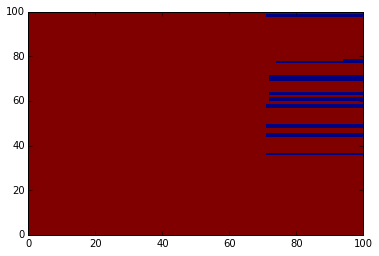

In [34]:
T = 100
Tend = 0
d_order = np.argsort(d)
d_order[:] = d_order[::-1] 
y = np.zeros((N,N,K,T))

x = np.zeros((N,K))
sum_x_po_k = np.zeros(N)

launch()
print d_order
print "K=",K
print x
plt.pcolor(x)
print "End time = ",Tend
path = str(Tend)+".png"
plt.savefig(path)

In [ ]:
%timeit launch()

[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]
[ 100.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   20.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. 